# 1st activation function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tanh()

In [ ]:
def tanh(x):
    return np.tanh(x)

sigmoid()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = np.linspace(-10, 10, 1000)

In [ ]:
y_tanh = tanh(x)
y_sigmoid = sigmoid(x)

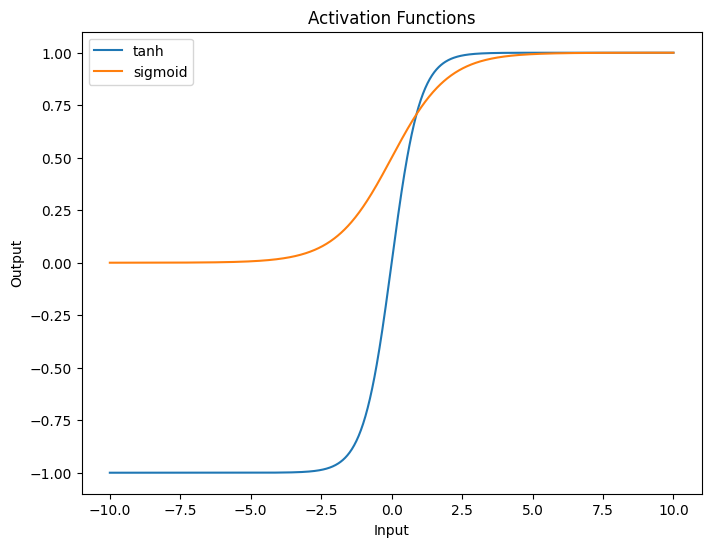

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y_tanh, label='tanh')
ax.plot(x, y_sigmoid, label='sigmoid')

ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_title('Activation Functions')
ax.legend()

plt.show()

# 2 ANDNOT using MP neuron

In [ ]:
import numpy as np

Define the McCulloch-Pitts neuron

In [ ]:
def mp_neuron(inputs, weights, threshold):
    # Compute the dot product of the inputs and weights
    net = np.dot(inputs, weights)
    # Apply the threshold function
    if net >= threshold:
        output = 1
    else:
        output = 0
    return output


Define the ANDNOT neural network

In [ ]:
def andnot_nn(inputs):
    weights = [-2, 1]
    threshold = 0
    # Compute the outputs of the two neurons in the first layer
    outputs = [mp_neuron(inputs, weights, threshold) for weights in [[-1, 1], [1, -1]]]
    # Compute the final output of the ANDNOT function
    if outputs[0] == 1 and outputs[1] == 0:
        output = 1
    else:
        output = 0
    return output

Test the ANDNOT neural network

In [ ]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = []
for i in range(inputs.shape[0]):
    y = andnot_nn(inputs[i].reshape(1, -1))
    outputs.append(y)
print("Inputs:", inputs)
print("Outputs:", outputs)

Inputs: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs: [0, 1, 0, 0]


# 3 Write a Python Program using Perceptron Neural Network to recognise even and odd numbers. 
Given numbers are in ASCII form 0 to 9.

In [ ]:
import numpy as np

# Define the training data
X = np.array([[0,0,1,1,0,1,1,1,1,1],  # 0
              [0,0,0,1,0,0,1,0,0,1],  # 1
              [0,1,1,1,1,1,1,1,1,1],  # 2
              [0,1,1,1,1,0,1,1,1,1],  # 3
              [0,1,0,1,0,0,1,0,0,1],  # 4
              [0,1,1,0,1,0,1,1,1,1],  # 5
              [0,1,1,0,1,1,1,1,1,1],  # 6
              [0,0,1,1,0,0,1,0,0,1],  # 7
              [0,1,1,1,1,1,1,1,1,1],  # 8
              [0,1,1,1,1,0,1,1,1,1]]) # 9

# Define the expected outputs for each input
y = np.array([[1], [0], [1], [0], [1], [0], [0], [0], [1], [0]])

# Define the activation function (step function)
def activation(z):
    return 1 if z >= 0 else 0

# Define the perceptron function
def perceptron(X, y, epochs=10, lr=0.1):
    # Initialize weights and bias to random values
    w = np.random.rand(X.shape[1])
    b = np.random.rand(1)

    for i in range(epochs):
        # Iterate over each input and output pair
        for j in range(X.shape[0]):
            # Calculate the weighted sum of inputs and bias
            z = np.dot(X[j], w) + b

            # Apply the activation function
            a = activation(z)

            # Calculate the error
            e = y[j] - a

            # Update the weights and bias
            w += lr * e * X[j]
            b += lr * e

    # Return the weights and bias
    return w, b

# Train the perceptron on the training data
w, b = perceptron(X, y)

# Test the perceptron on some inputs
test_inputs = np.array([[0,0,0,0,0,1,1,1,1,1],  # 10
                        [0,1,1,0,0,1,1,0,1,1],  # 73
                        [0,0,1,0,0,1,1,0,1,1]]) # 52

for i in range(test_inputs.shape[0]):
    # Calculate the weighted sum of inputs and bias
    z = np.dot(test_inputs[i], w) + b

    # Apply the activation function
    a = activation(z)

    # Print the output
    if a == 1:
        print("{} is even".format(i))
    else:
        print("{} is odd".format(i))

0 is odd
1 is odd
2 is odd


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Dataset
X = np.array([[1, 2], [2, 3], [3, 1], [4, 2], [2, 4], [3, 3]])
y = np.array([0, 0, 0, 1, 1, 1])


In [ ]:
# Perceptron Learning Law
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        # Initialize Weights and Bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for epoch in range(self.epochs):
            for xi, yi in zip(X, y):
                # Calculate Prediction
                prediction = self.predict(xi)
                
                # Update Weights and Bias
                delta = self.lr * (yi - prediction)
                self.weights += delta * xi
                self.bias += delta
                
    def predict(self, X):
        # Calculate Activation
        activation = np.dot(X, self.weights) + self.bias
        
        # Apply Step Function
        return np.where(activation >= 0, 1, 0)


In [ ]:
# Train Perceptron
perceptron = Perceptron(lr=0.1, epochs=100)
perceptron.fit(X, y)

In [ ]:
# Decision Regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
z

array([-0.26814024])

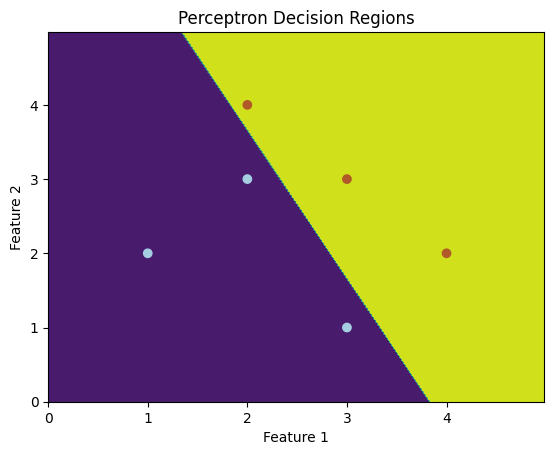

In [ ]:
# Plot Results
plt.contourf(xx, yy, Z, alpha=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.show()

# 5 Bidirectional Associative Memory with Two Pairs of Vectors


In [ ]:
import numpy as np


### Step 1: Understanding the BAM network

In [ ]:
class BAM:
    def __init__(self, input_size, output_size):
        self.weights = np.zeros((output_size, input_size))

    def train(self, input_patterns, output_patterns):
        for i in range(input_patterns.shape[0]):
            x = input_patterns[i]
            y = output_patterns[i]
            self.weights += np.outer(y, x)

    def recall_input(self, output_patterns):
        return np.dot(self.weights, output_patterns)

    def recall_output(self, input_patterns):
        return np.dot(self.weights, input_patterns)

### Step 2: Implementing the BAM network

In [ ]:
input_size = 2
output_size = 2
bam = BAM(input_size, output_size)


### Step 3: Training the BAM network

In [ ]:
input_patterns = np.array([[1, -1], [-1, 1]])
output_patterns = np.array([[-1, 1], [1, -1]])
bam.train(input_patterns, output_patterns)

### Step 4: Testing the BAM network

*Test input to output*

In [ ]:
test_input = np.array([1, -1])
output_recall = bam.recall_output(test_input)
print("Input:", test_input)
print("Recalled Output:", output_recall)

Input: [ 1 -1]
Recalled Output: [-4.  4.]


*Test output to input*

In [ ]:
test_output = np.array([-1, 1])
input_recall = bam.recall_input(test_output)
print("Input Recall:", input_recall)
print("Recalled Output:", test_output)

Input Recall: [ 4. -4.]
Recalled Output: [-1  1]


# 6 Implement Artificial Neural Network training process in Python by using Forward Propagation, Back Propagation. (Without dataset)

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        self.z = np.dot(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W2)
        output = self.sigmoid(self.z3)
        return output
    
    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        self.z2_error = self.output_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error * self.sigmoid_derivative(self.z2)
        
        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.output_delta)
        
    def train(self, X, y, iterations):
        for i in range(iterations):
            output = self.forward(X)
            self.backward(X, y, output)



how to implement

In [ ]:

X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=3, hidden_size=4, output_size=1)
nn.train(X, y, iterations=1500)

print(nn.forward(X))

[[0.03430041]
 [0.95724081]
 [0.98024734]
 [0.03527731]]


# Write a python program to show Back Propagation Network for XOR function with Binary Input and Output

In [ ]:
import numpy as np

# Define Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define Derivative of Sigmoid Activation Function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define XOR Function Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define Neural Network Architecture
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Initialize Weights and Biases
weights1 = np.random.uniform(size=(input_layer_size, hidden_layer_size))
bias1 = np.random.uniform(size=(1, hidden_layer_size))
weights2 = np.random.uniform(size=(hidden_layer_size, output_layer_size))
bias2 = np.random.uniform(size=(1, output_layer_size))

# Define Learning Rate and Number of Epochs
learning_rate = 0.1
epochs = 10000

# Train Neural Network with Back Propagation Algorithm
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_output = sigmoid(np.dot(X, weights1) + bias1)
    output_layer_output = sigmoid(np.dot(hidden_layer_output, weights2) + bias2)
    
    # Back Propagation
    error = y - output_layer_output
    output_layer_delta = error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_layer_delta.dot(weights2.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    
    # Update Weights and Biases
    weights2 += hidden_layer_output.T.dot(output_layer_delta) * learning_rate
    bias2 += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate
    weights1 += X.T.dot(hidden_layer_delta) * learning_rate
    bias1 += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

# Predict XOR Function
predictions = sigmoid(np.dot(sigmoid(np.dot(X, weights1) + bias1), weights2) + bias2)
print(predictions)

[[0.0592218 ]
 [0.9447508 ]
 [0.94463648]
 [0.06026903]]


# 8 Write a python program to illustrate ART neural network.

In [ ]:

import numpy as np

class ARTNetwork:
    def __init__(self, input_size, rho, alpha):
        self.input_size = input_size
        self.rho = rho
        self.alpha = alpha
        self.W = np.zeros(input_size)
        self.V = np.ones(input_size)
        
    def train(self, X):
        for x in X:
            y = x / (self.rho + np.linalg.norm(self.W))
            j = np.argmax(y)
            if y[j] >= self.alpha * np.sum(y) and self.V[j] > 0:
                self.W += self.V[j] * x
                self.V[j] *= 0.5
            else:
                self.V[j] += 0.5
                
    def classify(self, X):
        classes = []
        for x in X:
            y = x / (self.rho + np.linalg.norm(self.W))
            j = np.argmax(y)
            classes.append(j)
        return classes
        
X_train = np.array([[0, 1, 1, 0],
                    [1, 0, 0, 1],
                    [1, 0, 0, 0]])
X_test = np.array([[0, 1, 0, 0],
                    [1, 1, 1, 0]])
input_size = X_train.shape[1]

rho = 0.5
alpha = 0.9

art_network = ARTNetwork(input_size, rho, alpha)
art_network.train(X_train)
classes = art_network.classify(X_test)

for i, data in enumerate(X_test):
  print(f"Test Data {i+1}: Predicted Class: {classes[i]}")


Test Data 1: Predicted Class: 1
Test Data 2: Predicted Class: 0


# 9

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, num_inputs, num_hidden, num_outputs):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        self.weights1 = np.random.randn(self.num_inputs, self.num_hidden)
        self.weights2 = np.random.randn(self.num_hidden, self.num_outputs)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feed_forward(self, inputs):
        self.hidden_layer = self.sigmoid(np.dot(inputs, self.weights1))
        self.output_layer = self.sigmoid(np.dot(self.hidden_layer, self.weights2))
        return self.output_layer

    def back_propagation(self, inputs, targets, learning_rate):
        output_error = targets - self.output_layer
        output_delta = output_error * self.sigmoid_derivative(self.output_layer)

        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer)

        self.weights2 += learning_rate * np.dot(self.hidden_layer.T, output_delta)
        self.weights1 += learning_rate * np.dot(inputs.T, hidden_delta)

    def train(self, inputs, targets, num_epochs, learning_rate):
        for i in range(num_epochs):
            self.feed_forward(inputs)
            self.back_propagation(inputs, targets, learning_rate)


In [ ]:
# Create a neural network with 2 inputs, 3 hidden neurons, and 1 output
nn = NeuralNetwork(2, 3, 1)

# Train the neural network with some training data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])
nn.train(inputs, targets, num_epochs=10000, learning_rate=0.1)

# Test the neural network on some new input data
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input_ in test_inputs:
    print(input_, nn.feed_forward(input_))


[0 0] [0.09842948]
[0 1] [0.90525383]
[1 0] [0.90826199]
[1 1] [0.51107053]


# 10

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension to the images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Set up the layers of the network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the MNIST dataset
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Evaluate the model on the MNIST test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 23s 5ms/step - loss: 0.1488 - accuracy: 0.9553 - val_loss: 0.0559 - val_accuracy: 0.9812
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0363 - val_accuracy: 0.9875
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9859
Test accuracy: 0.9858999848365784


# 11

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


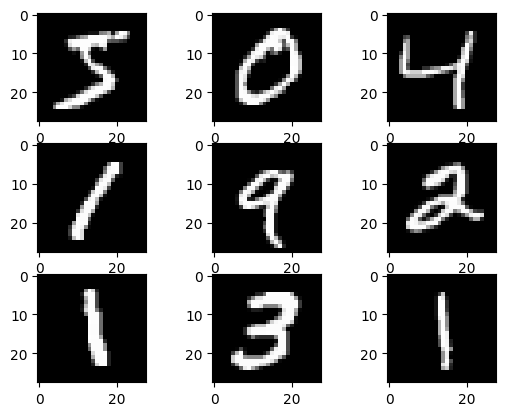

In [ ]:
import tensorflow
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = define_model()
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	model.save('final_model.h5')
 
run_test_harness()

In [ ]:
from keras.datasets import mnist
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
 
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = load_model('final_model.h5')
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
 
run_test_harness()

> 99.210


In [ ]:
from numpy import argmax
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
 
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img
 
def run_example():
	img = load_image('sample_image.png')
	model = load_model('final_model.h5')
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)
 
run_example()

/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


FileNotFoundError: ignored